In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [ ]:
# OBTENER EL DATASET

data_player = pd.read_csv("../LIBRERIAS/datos/player_valuations.csv")
data_player.head()

In [ ]:
# CAMBIAR EL NOMBRE DE UNA COLUMNA

data_player.rename(columns={"date": "fecha" }, inplace=True)
data_player.rename(columns={"player_id": "id_jugador" }, inplace=True)
data_player.rename(columns={"market_value_in_eur": "precio_en_euros" }, inplace=True)
data_player.rename(columns={"current_club_id": "id_club_actual" }, inplace=True)
data_player.rename(columns={"player_club_domestic_competition_id": "id_competicion_domestica" }, inplace=True)

data_player.head()

In [ ]:
# ORDENAR LOS DATOS

data_order_dsc = data_player.sort_values(by="precio_en_euros", ascending=False)
data_order_asc = data_player.sort_values(by="precio_en_euros", ascending=True)
data_order_dsc.head()

ESTADÍSTICA DESCRIPTIVA

In [ ]:
# Configurar formato de visualización para mostrar números completos

pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_order_dsc.describe()

In [ ]:
# FUNCIONES EN PANDAS

print("MEDIA: ", data_order_dsc["precio_en_euros"].mean()) # Media
print("MEDIANA: ", data_order_dsc["precio_en_euros"].median()) # Mediana
print("MODA: ", data_order_dsc["precio_en_euros"].mode()) # Moda

In [ ]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style="plain", axis="y")

# Boxplot con matplotlib 
plt.boxplot(data_order_dsc["precio_en_euros"])
plt.title("Boxplot de precio_en_euros")
plt.show()


In [ ]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style="plain", axis="y")

# Histograma con matplotlib
plt.hist(data_order_asc["precio_en_euros"], bins=100)
plt.title("Histograma de precio_en_euros")
plt.show()

In [20]:
# Calcular el rango intercuartílico (IQR)
Q1 = data_order_asc["precio_en_euros"].quantile(0.25)
Q3 = data_order_asc["precio_en_euros"].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
dt_filtered = data_order_asc[(data_order_asc["precio_en_euros"] >= lower_bound) & (data_order_asc["precio_en_euros"] <= upper_bound)]
dt_filtered

,id_jugador,fecha,precio_en_euros,id_club_actual,id_competicion_domestica
15338,60096,2008-03-17,0,2696,RU1
370966,36237,2021-10-16,10000,68608,PO1
429529,621277,2023-02-06,10000,1005,IT1
429511,456650,2023-02-06,10000,4171,IT1
429524,537142,2023-02-06,10000,1005,IT1
...,...,...,...,...,...
15355,18644,2008-03-19,3400000,2687,ES1
15484,40433,2008-03-31,3400000,46,IT1
15560,15762,2008-04-04,3400000,11282,TR1
15574,44027,2008-04-04,3400000,1084,ES1


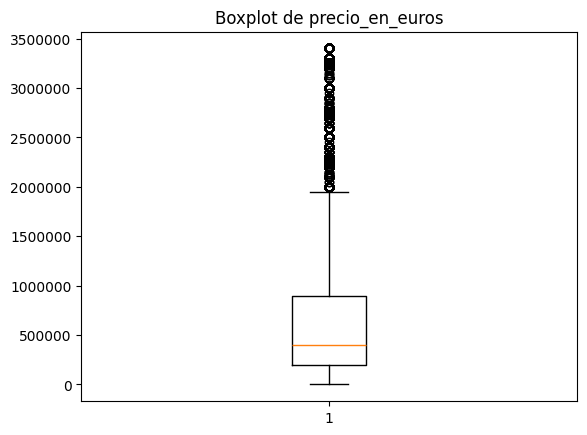

In [21]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(dt_filtered["precio_en_euros"])
plt.title("Boxplot de precio_en_euros")
plt.show()

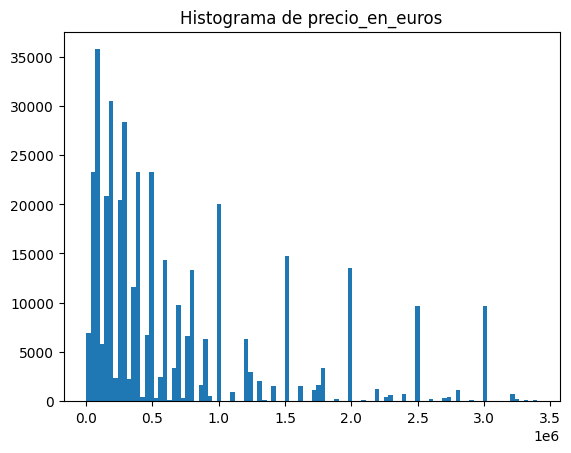

In [23]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.hist(dt_filtered["precio_en_euros"], bins=100)
plt.title("Histograma de precio_en_euros")
plt.show()

In [24]:
# 2. Medidas de dispersión

# Calcular el rango
rango = dt_filtered["precio_en_euros"].max() - dt_filtered["precio_en_euros"].min()
rango

np.int64(3400000)